In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import seaborn as sns

In [ ]:
bb_data = pd.read_csv("IMB575 (Customer Analytics at Bigbasket - Product Recommendations, Spreadsheet).csv")

In [ ]:
bb_data.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar


### Data Types

In [ ]:
bb_data.dtypes

Member         object
Order           int64
SKU             int64
Created On     object
Description    object
dtype: object

In [ ]:
bb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62141 entries, 0 to 62140
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Member       62141 non-null  object
 1   Order        62141 non-null  int64 
 2   SKU          62141 non-null  int64 
 3   Created On   62141 non-null  object
 4   Description  62141 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


### There are no null values and no missing values.

In [ ]:
bb_data['SKU'] = bb_data['SKU'].astype('object')
bb_data['Order'] = bb_data['Order'].astype('object')
bb_data.describe(include = 'object')

,Member,Order,SKU,Description
count,62141,62141,62141,62141
unique,106,8387,1732,216
top,M38622,6738016,15668381,Other Vegetables
freq,1438,42,1702,4606


In [ ]:
bb_data[bb_data['Description']=='Other Vegetables']['SKU'].unique()

array(['15668381', '15668379', '15668378', '15668380', '15668383',
       '15670107', '15668382'], dtype=object)

In [ ]:
bb_data["SKU"].value_counts()

SKU
15668381    1702
15668688    1540
15668460    1439
15668379    1415
15668478    1252
            ... 
34994247       1
34934321       1
34992292       1
34930814       1
34990383       1
Name: count, Length: 1732, dtype: int64

In [ ]:
bb_data['Description'].unique()

array(['Other Sauces', 'Cashews', 'Other Dals', 'Namkeen', 'Sugar',
       'Banana', 'Sugar Cubes', 'Other Sweets', 'Other Rice Products',
       'Utensil Scrub Pads', 'Toor Dal', 'Buns & Pavs', 'Cakes',
       'Boiled Rice', 'Urad Dal', 'Jaggery', 'Raisins', 'Chips',
       'Almonds', 'Root Vegetables', 'Other Vegetables', 'Moong Dal',
       'Healthy Snacks', 'Raw Peanuts', 'Mosquito Repellent',
       'Whole Spices', 'Soya Products', 'Beans', 'Health Drinks',
       'Liquid Soaps & Bars', 'Washing Bars', 'Ghee', 'Organic F&V',
       'Sunflower Oils', 'Shoe Polish', 'Cream Biscuits', 'Cookies',
       'Snacky Nuts', 'Avalakki / Poha', 'Besan', 'Raw Rice',
       'Powdered Spices', 'Eggs', 'Corn Snacks', 'Bread',
       'Instant Noodles', 'Sooji & Rava', 'Gourd & Cucumber',
       'Shaving Cream, Foam & Gels', 'Brinjals', 'Hair Oil',
       'Ground Coffee', 'Other Dry Fruits', 'Basmati Rice', 'Face Wash',
       'Yogurt & Lassi', 'Wafers', 'Instant Pastas', 'Cooking Paste',
       'O

In [ ]:
bb_data = bb_data [~ bb_data['Description'].isin(['CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books'])]

In [ ]:
bb_data['Description'].unique()

array(['Other Sauces', 'Cashews', 'Other Dals', 'Namkeen', 'Sugar',
       'Banana', 'Sugar Cubes', 'Other Sweets', 'Other Rice Products',
       'Utensil Scrub Pads', 'Toor Dal', 'Buns & Pavs', 'Cakes',
       'Boiled Rice', 'Urad Dal', 'Jaggery', 'Raisins', 'Chips',
       'Almonds', 'Root Vegetables', 'Other Vegetables', 'Moong Dal',
       'Healthy Snacks', 'Raw Peanuts', 'Mosquito Repellent',
       'Whole Spices', 'Soya Products', 'Beans', 'Health Drinks',
       'Liquid Soaps & Bars', 'Washing Bars', 'Ghee', 'Organic F&V',
       'Sunflower Oils', 'Shoe Polish', 'Cream Biscuits', 'Cookies',
       'Snacky Nuts', 'Avalakki / Poha', 'Besan', 'Raw Rice',
       'Powdered Spices', 'Eggs', 'Corn Snacks', 'Bread',
       'Instant Noodles', 'Sooji & Rava', 'Gourd & Cucumber',
       'Shaving Cream, Foam & Gels', 'Brinjals', 'Hair Oil',
       'Ground Coffee', 'Other Dry Fruits', 'Basmati Rice', 'Face Wash',
       'Yogurt & Lassi', 'Wafers', 'Instant Pastas', 'Cooking Paste',
       'O

In [ ]:
bb_data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [ ]:
top_10 = pd.DataFrame(bb_data[['SKU','Description']].value_counts().head(10)).reset_index()
top_10.columns = ['SKU','Description', 'count']
top_10

,SKU,Description,count
0,15668381,Other Vegetables,1702
1,15668688,Root Vegetables,1540
2,15668460,Gourd & Cucumber,1439
3,15668379,Other Vegetables,1415
4,15668478,Banana,1252
5,15668468,Beans,1137
6,15668378,Other Vegetables,1003
7,15668467,Beans,963
8,15668416,Banana,936
9,15668465,Root Vegetables,923


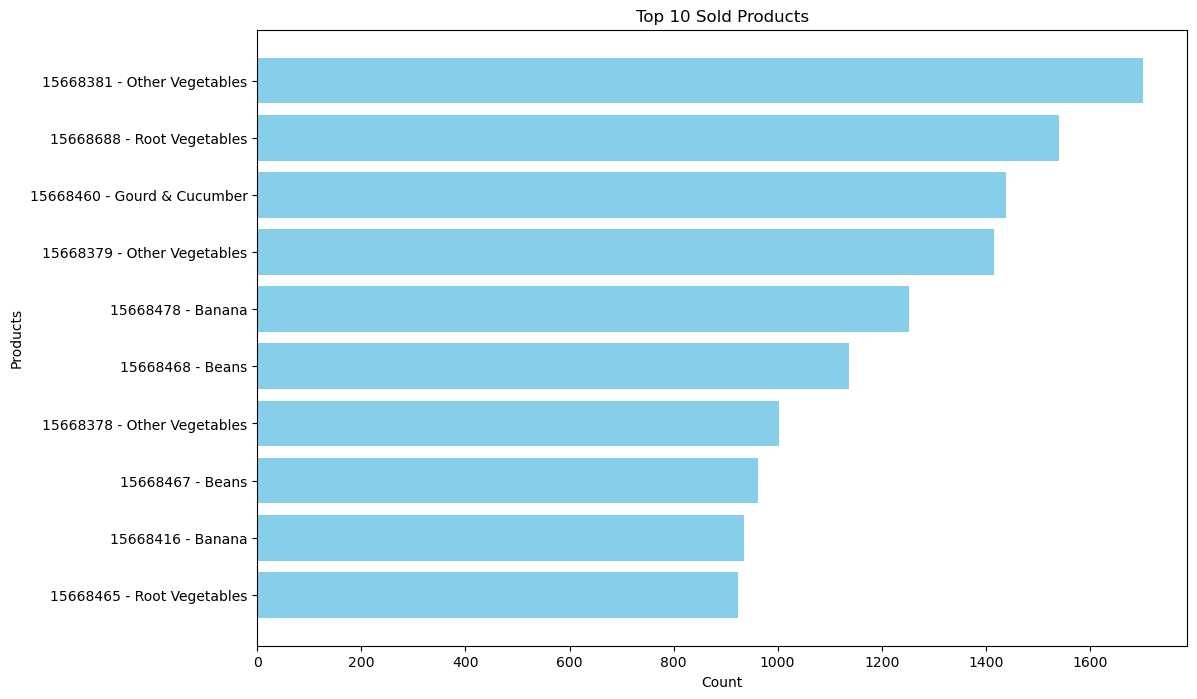

In [ ]:
top_10_df = top_10

top_10_df['Product'] = top_10['SKU'].astype(str) + ' - ' + top_10['Description']

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_10_df['Product'], top_10_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Products')
plt.title('Top 10 Sold Products')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

In [ ]:
items_per_order = bb_data.groupby('Order')['SKU'].count()

average_items_per_order = items_per_order.mean()

print("Number of items per order:")
print(items_per_order)
print("\nAverage number of items per order:", average_items_per_order)

Number of items per order:
Order
6422558     9
6422636    11
6423338    12
6423534     4
6423959     4
           ..
8387964     3
8387967     6
8388196     7
8388442    24
8388492    13
Name: SKU, Length: 8387, dtype: int64

Average number of items per order: 7.409204721592942


In [ ]:
bb_data['Created On']

0        22-09-2014 22:45
1        22-09-2014 22:45
2        22-09-2014 22:45
3        22-09-2014 22:45
4        22-09-2014 22:45
               ...       
62136    16-11-2013 00:43
62137    16-11-2013 00:43
62138    16-11-2013 00:43
62139    16-11-2013 00:43
62140    16-11-2013 00:43
Name: Created On, Length: 62141, dtype: object

In [ ]:
bb_data['Created On'] = pd.to_datetime(bb_data['Created On'], format='mixed')

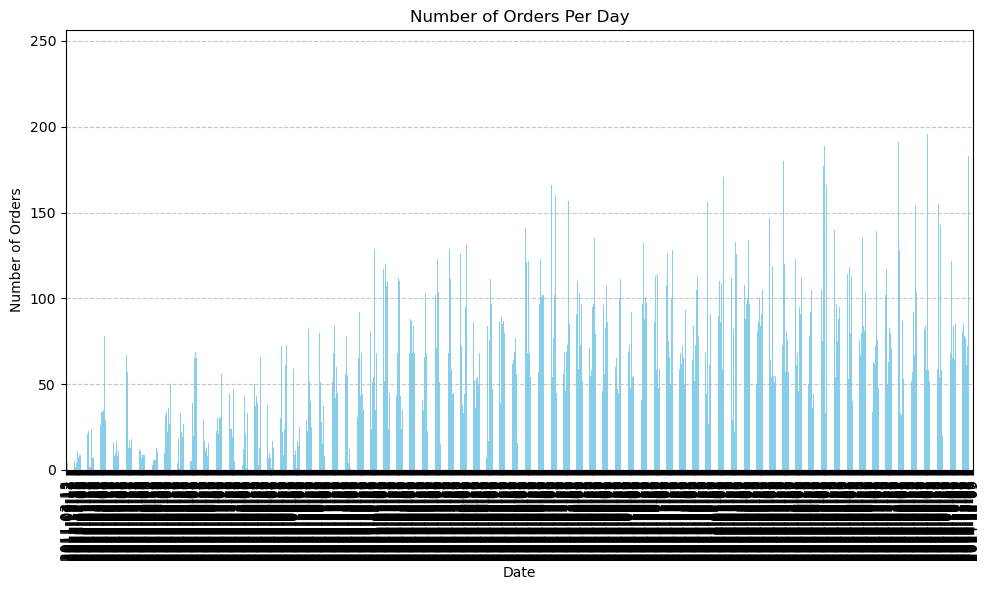

In [ ]:
orders_per_day = bb_data.groupby(bb_data['Created On'].dt.date)['Order'].count()

# Plotting
plt.figure(figsize=(10, 6))
orders_per_day.plot(kind='bar', color='skyblue')
plt.title('Number of Orders Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

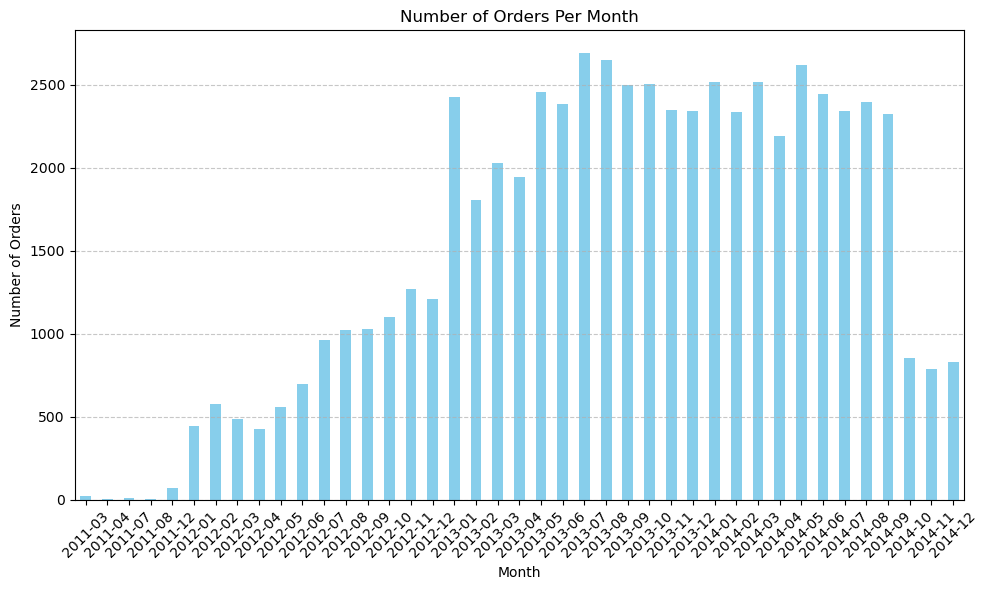

In [ ]:
orders_per_month = bb_data.groupby(bb_data['Created On'].dt.to_period('M'))['Order'].count()

# Plotting
plt.figure(figsize=(10, 6))
orders_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
bb_data['Year'] = bb_data['Created On'].dt.year

# Group by year and product, count the number of orders
year_product_counts = bb_data.groupby(['Year', 'Description'])['Order'].count()

# Find the top 10 products for each year
top_products_by_year = year_product_counts.groupby('Year').nlargest(10).reset_index(level=0, drop=True)

print(top_products_by_year)

Year  Description     
2011  Other Vegetables      21
      Beans                 15
      Root Vegetables       15
      Brinjals              11
      Gourd & Cucumber      11
      Bread                 10
      Banana                 5
      Cream Biscuits         3
      Diapers & Wipes        3
      Ground Coffee          3
2012  Beans                930
      Root Vegetables      747
      Other Vegetables     734
      Gourd & Cucumber     557
      Brinjals             499
      Other Dals           466
      Organic F&V          398
      Banana               345
      Bread                285
      Whole Spices         270
2013  Beans               2131
      Organic F&V         2096
      Other Vegetables    2064
      Root Vegetables     1843
      Other Dals          1460
      Gourd & Cucumber    1384
      Whole Spices        1319
      Brinjals            1268
      Namkeen              969
      Banana               940
2014  Other Vegetables    1787
      Root Veget

In [ ]:
bb_data = pd.read_csv("IMB575 (Customer Analytics at Bigbasket - Product Recommendations, Spreadsheet).csv")
bb_data.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar


## This cell defines a function apriori_recommender that uses the apriori algorithm to generate association rules from transaction data.

In [ ]:
def apriori_recommender(df, member_id, min_support, top):

    df_member = df[df['Member'] == member_id]

    basket = (df_member.groupby(['Order', 'Description'])['Description'].count().unstack().reset_index().fillna(0).set_index('Order'))

    basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
    frequent_itemsets.sort_values(['support'], ascending=False, inplace=True)

    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
    rules.sort_values(['lift', 'support'], ascending=False, inplace=True)
    rules.reset_index(drop=True, inplace=True)

    recommendations = rules.loc[:, ['antecedents', 'consequents', 'antecedent support', 'consequent support', 'confidence', 'lift']]
    return recommendations.head(top)

In [ ]:
apriori_recommender(bb_data, 'M36432', 0.1, 3)

C:\Users\91967\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,confidence,lift
0,(Gourd & Cucumber),(Brinjals),0.300493,0.182266,0.409836,2.248560
1,(Brinjals),(Gourd & Cucumber),0.182266,0.300493,0.675676,2.248560
2,(Other Vegetables),(Beans),0.261084,0.192118,0.396226,2.062409


## This cell defines a function cosine_missing that generates product recommendations based on cosine similarity.

In [ ]:
def cosine_missing(df, order_id, top):
    basket = (df.groupby(['Order', 'Description'])['Description'].count().unstack().reset_index().fillna(0).set_index('Order'))

    basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

    cosine_sim = 1 - pairwise_distances(basket_sets, metric='cosine')
    cosine_sim = pd.DataFrame(cosine_sim, index=basket_sets.index, columns=basket_sets.index)

    sim_scores = cosine_sim.loc[order_id]

    sim_scores = sim_scores.drop(order_id).sort_values(ascending=False)
    most_similar_orders = sim_scores.head(top).index

    similar_items = basket_sets.loc[most_similar_orders].sum().sort_values(ascending=False)

    items_in_order = basket_sets.loc[order_id]
    missing_items = similar_items[items_in_order == 0].head(top)

    return missing_items.index.tolist()

In [ ]:
cosine_missing(bb_data,6468572, 3)

['Raw Peanuts', 'Cookies', 'Other Jams']